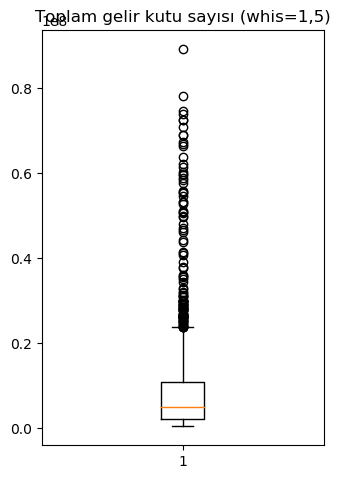

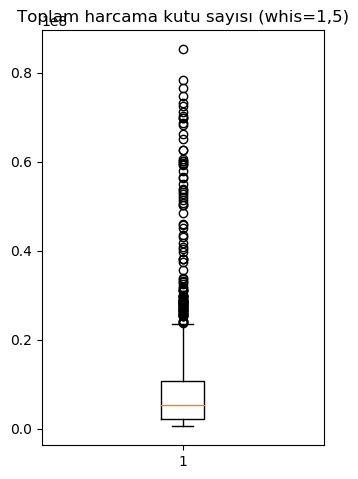

In [29]:
#soru_1
#Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin.
#Bu değişkenler aykırı değerler içeriyor mu?
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
from scipy.stats.mstats import winsorize
states = pd.read_csv("C:\\Users\\PC\\Desktop\\states_all.csv")
states['TOTAL_REVENUE'].head()
states['TOTAL_REVENUE'].tail 
states['TOTAL_EXPENDITURE'].tail #toplam gelir ve toplam harcam verilerinin son değerleri oldukça eksik onları dropna ile yok sayalım.
plt.subplot(1,2,1)
plt.boxplot(states["TOTAL_REVENUE"].dropna())
plt.title("Toplam gelir kutu sayısı (whis=1,5)")
plt.show()
plt.subplot(1,2,2)
plt.boxplot(states["TOTAL_EXPENDITURE"].dropna())
plt.title("Toplam harcama kutu sayısı (whis=1,5)")
plt.show()     # Değişkenlerin aykırı değerleri aşağıdaki kutu grafiğinde görünüyor.Oldukça fazla.

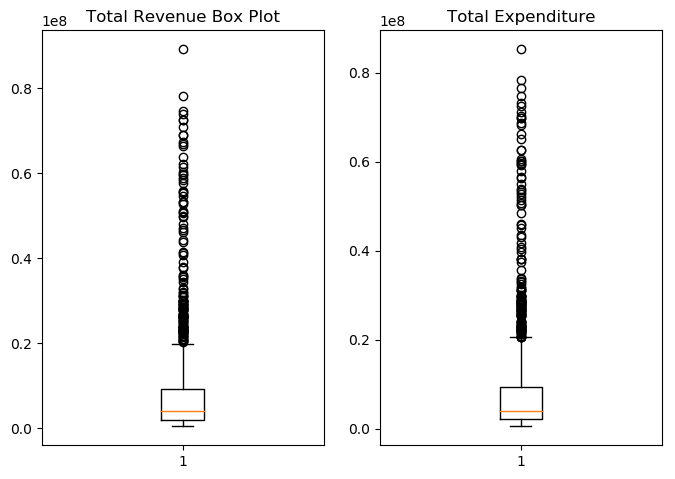

In [7]:
#Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini
#enterpolasyonla dolduralım ve boxplot ile aşırı değerlerine bakalım.

Totalrint= states['TOTAL_REVENUE'].interpolate()
Totalexint= states['TOTAL_EXPENDITURE'].interpolate()
plt.subplot(1,2,1)
plt.boxplot(Totalrint)
plt.title('Total Revenue Box Plot')

plt.subplot(1,2,2)
plt.boxplot(Totalexint)
plt.title('Total Expenditure')
plt.show()     #Her iki değişkende de aşırı değer vardır.

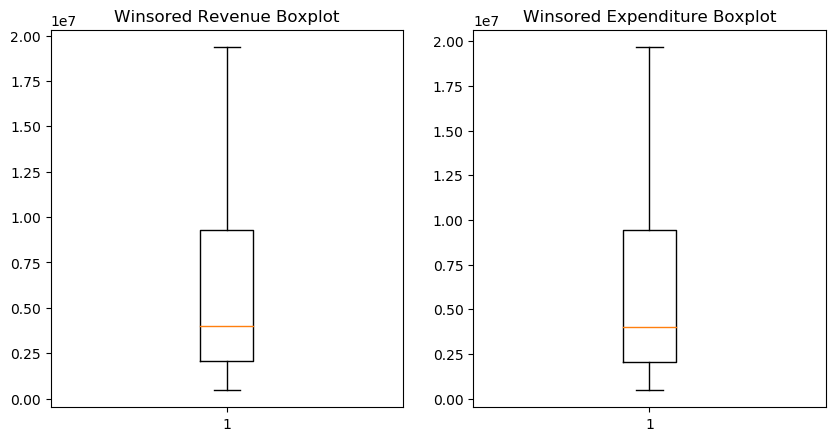

In [30]:
#soru_2
#Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz 
#bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın
#ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.
#winsorize ile aşırı değerleri sınırlama.
from scipy.stats.mstats import winsorize
winstotalr = winsorize(Totalrint , (0,0.10))
winstotale = winsorize(Totalexint , (0,0.10))

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(winstotalr)
plt.title('Winsored Revenue Boxplot')

plt.subplot(1,2,2)
plt.boxplot(winstotale)
plt.title('Winsored Expenditure Boxplot')
plt.show()            #kutu grafikleri artık aykırı değer içermiyor.


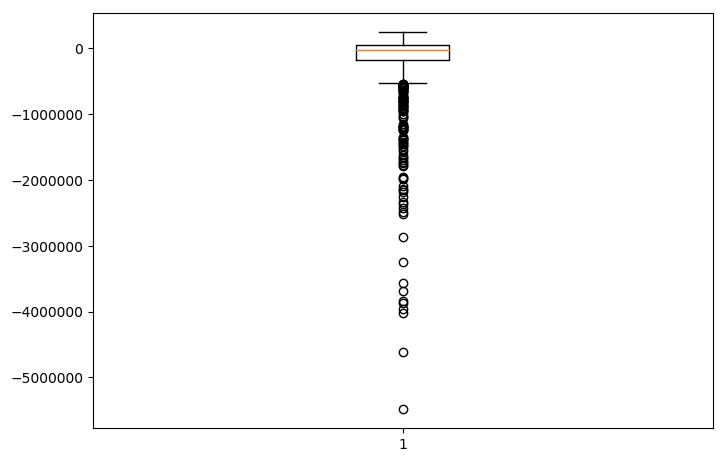

In [42]:
#soru_3
#Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak 
#bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). 
#Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.
states['BUTCEACIK'] = states['TOTAL_REVENUE'] - states['TOTAL_EXPENDITURE']
winsbutceacık = winsorize(states['BUTCEACIK'].dropna(), (0,0.10))
plt.boxplot(winsbutceacık)
plt.show()  #yeni değişkende aykırı değerler winsorize yaptıktan sonra bile var.


Text(0.5, 1.0, 'Winsored Bütçe')

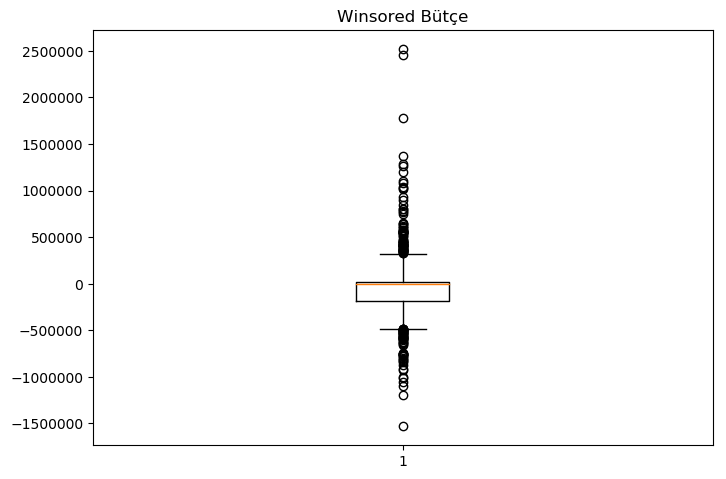

In [53]:
#soru_4
#Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak 
#bütçe açığı olarak düşünülebilecek bir değişken oluşturun. 
#Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. 
#Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.
states['BUTCE']=winstotalr - winstotale 


plt.boxplot(states['BUTCE'].dropna())
plt.title('Winsored Bütçe')

# aykırı değerler daralmış olsa da hala var.

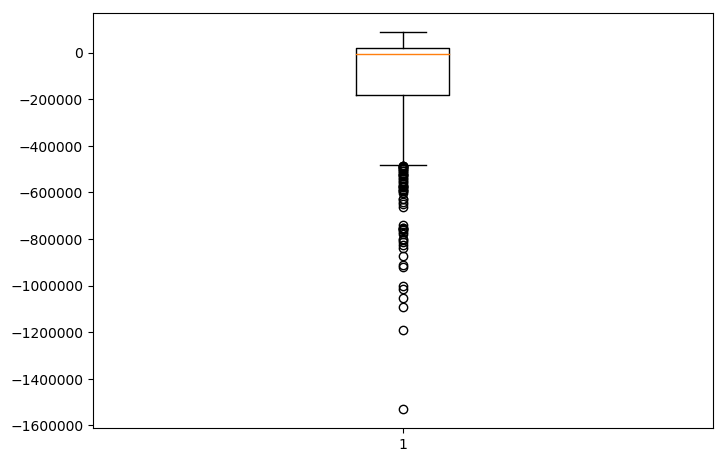

In [54]:
#Aykırı değerleri temizleme
winsbutce= winsorize(states['BUTCE'].dropna(), (0,0.15))
plt.boxplot(winsbutce)
plt.show() 

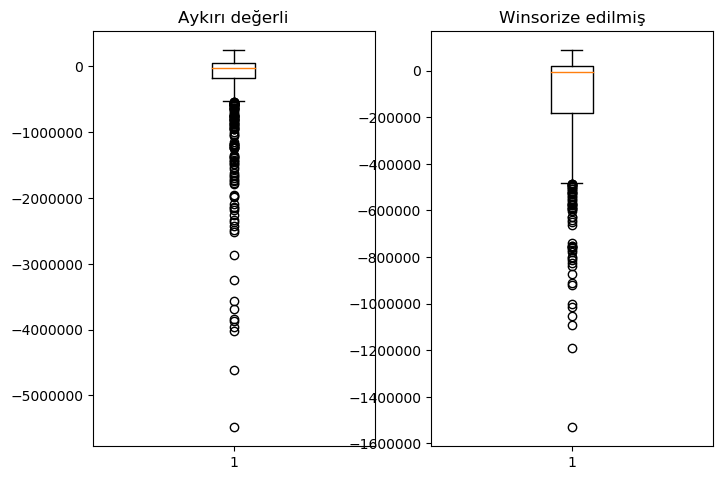

In [55]:
#soru_5
#Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. 
#Bu ikisi arasında fark görüyor musunuz?
plt.subplot(1,2,1)
plt.boxplot(winsbutceacık)
plt.title('Aykırı değerli')

plt.subplot(1,2,2)
plt.boxplot(winsbutce)
plt.title('Winsorize edilmiş')
plt.show()      
#iki farklı bütçe açığı değişkeni için de aykırı değerler var.Winsorize edildikten sonra azalmış. İkinci yöntemi tercih edebilirdim.

In [ ]:
#soru_6
#Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. 
#Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

#Aykırı değerlerin varlığı veride önemi fazlaysa temizlemeden birinci yöntemi uygulamak daha verimli olabilir.